In [22]:
# Suppress depreciation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

# Add the path to the parent directory to augment search for pytreefile module
sys.path.append('../')
from pytreefile import treefiles

### Read segment level data from forest treefile generated using treeinfo

In [23]:
segment_df = treefiles.treeinfo_attributes_segment('example_data/forest_trees_info.txt')
segment_df

,tree_id,x,y,z,radius,parent_id,section_id,volume,diameter,length,strength,min_strength,dominance,angle,children,branch,branch_order,extension,pos_in_branch,segment_length
1,1,-9.4590,8.0243,0.8949,0.0714,0.0,21.0,0.0140,0.1428,6.7154,0.0346,0.0346,0.0000,0.0000,1.0,0.0,2.0,1.0,0.8750,0.0
2,1,-9.4142,7.9797,1.1860,0.0712,1.0,42.0,0.0047,0.1424,5.8405,0.0397,0.0346,0.4387,49.5808,2.0,0.0,3.0,2.0,0.2979,0.0
3,1,-9.4608,7.9984,1.4066,0.0602,2.0,63.0,0.0026,0.1204,5.5426,0.0369,0.0346,0.0000,0.0000,1.0,0.0,5.0,3.0,0.2262,0.0
4,1,-9.3133,7.9162,1.4486,0.0379,2.0,84.0,0.0013,0.0758,3.5417,0.0408,0.0346,0.0000,0.0000,1.0,1.0,6.0,0.0,0.2884,0.0
5,1,-9.5181,8.0216,1.7458,0.0602,3.0,85.0,0.0039,0.1204,5.3163,0.0384,0.0346,0.0000,0.0000,1.0,0.0,7.0,4.0,0.3448,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,21,3.4574,-8.8297,2.5584,0.0176,28.0,1273.0,0.0001,0.0352,1.1035,0.0736,0.0372,0.0000,0.0000,0.0,1.0,0.0,4.0,0.1035,0.0
2497,21,3.0287,-8.7909,2.2568,0.0195,29.0,1272.0,0.0002,0.0390,1.1330,0.0775,0.0372,0.0000,0.0000,0.0,1.0,0.0,9.0,0.1330,0.0
2498,21,3.9050,-9.0479,2.5712,0.0253,30.0,1274.0,0.0002,0.0506,1.4445,0.0739,0.0372,0.0000,0.0000,1.0,0.0,34.0,18.0,0.1055,0.0
2499,21,4.0049,-9.0161,2.6635,0.0252,33.0,1404.0,0.0003,0.0504,1.3389,0.0794,0.0372,0.0000,0.0000,1.0,0.0,35.0,19.0,0.1397,0.0


### Plot the mean volume by height with bins of 1 meter for the forest

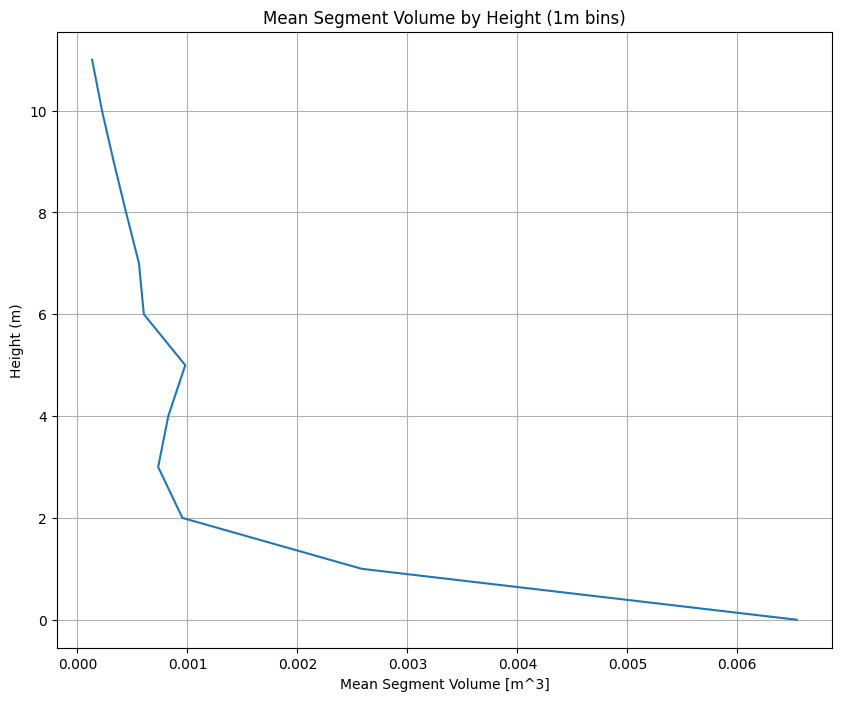

In [24]:
# Normalize 'z' values to start from 0
segment_df.loc[:, 'z_normalized'] = segment_df['z'] - segment_df['z'].min()

# Round the normalized 'z' values to the nearest meter
segment_df.loc[:, 'z_rounded'] = np.round(segment_df['z_normalized'])

# Group by the rounded normalized height ('z_rounded') and calculate the mean volume for each bin
mean_volume_by_height = segment_df.groupby('z_rounded')['volume'].mean()

# Plot the mean volume by height with bins of 1 meter
plt.figure(figsize=(10, 8))
plt.plot(mean_volume_by_height.values, mean_volume_by_height.index, linestyle='-')

# Add labels and title
plt.ylabel('Height (m)')
plt.xlabel('Mean Segment Volume [m^3]')
plt.title('Mean Segment Volume by Height (1m bins)')

# Show the plot
plt.grid(True)
plt.show()


### Plot the mean segment volume by height with bins of 1 meter for a single tree

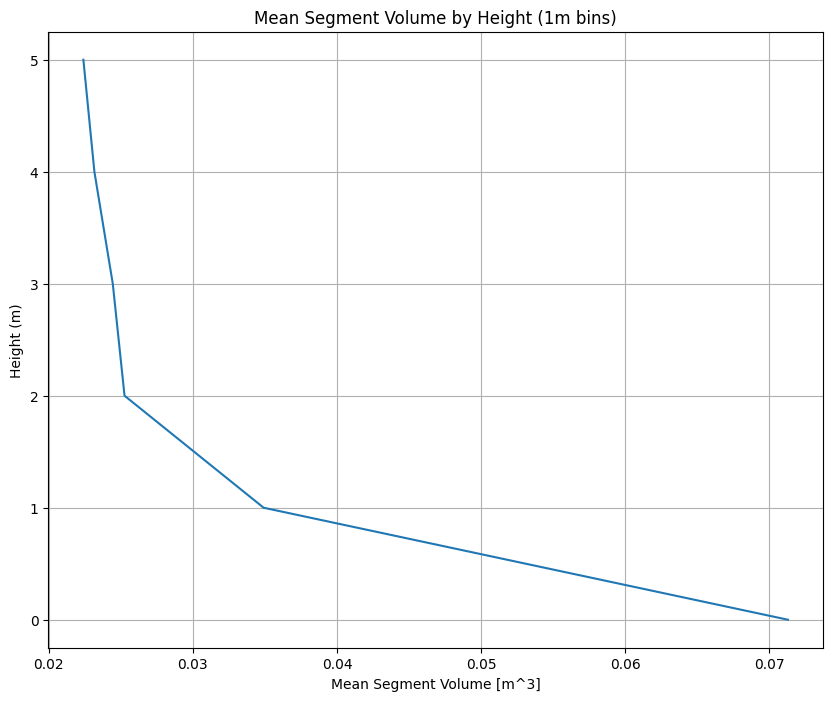

In [25]:
# Select a single tree from the segment dataframe
segment_df_single = segment_df.loc[segment_df['tree_id'] == 1]

# Normalize 'z' values to start from 0
segment_df_single.loc[:, 'z_normalized'] = segment_df_single['z'] - segment_df_single['z'].min()

# Round the normalized 'z' values to the nearest meter
segment_df_single.loc[:, 'z_rounded'] = np.round(segment_df_single['z_normalized'])

# Group by the rounded normalized height ('z_rounded') and calculate the mean volume for each bin
mean_volume_by_height = segment_df_single.groupby('z_rounded')['radius'].mean()

# Plot the mean volume by height with bins of 1 meter
plt.figure(figsize=(10, 8))
plt.plot(mean_volume_by_height.values, mean_volume_by_height.index, linestyle='-')

# Add labels and title
plt.ylabel('Height (m)')
plt.xlabel('Mean Segment Volume [m^3]')
plt.title('Mean Segment Volume by Height (1m bins)')

# Show the plot
plt.grid(True)
plt.show()


### Group by 'tree_id' and calculate the sum of 'volume' for each group

In [26]:
total_volume_per_tree = segment_df.groupby('tree_id')['volume'].sum()
total_volume_per_tree

tree_id
1     0.0644
2     0.0494
3     0.0486
4     0.0527
5     0.0433
6     0.5785
7     0.0570
8     0.0398
9     0.0248
10    0.0556
11    0.0385
12    0.3919
13    0.0389
14    0.2394
15    0.0268
16    0.0232
17    0.0500
18    0.3677
19    0.0906
20    0.0391
21    0.0159
Name: volume, dtype: float64

### Read in tree level data from forest treefile generated using treeinfo

In [27]:
tree_info_df = treefiles.treeinfo_attributes_tree('example_data/forest_trees_info.txt')
tree_info_df

,tree_id,height,crown_radius,dimension,monocotal,DBH,bend,branch_slope
0,1,6.4465,3.0673,1.6896,0.2133,0.1204,0.0201,0.9506
1,2,5.7072,2.7912,1.6894,0.1508,0.1009,0.0233,1.1782
2,3,5.5259,2.6302,1.8924,0.2570,0.1066,0.0220,1.0538
3,4,6.3748,2.8451,1.7520,0.1799,0.1074,0.0089,0.8673
4,5,5.4953,2.5555,1.7444,0.1425,0.0989,0.0169,1.2340
5,6,12.0253,7.9385,1.7826,0.2271,0.2926,0.0201,1.0015
6,7,6.2397,3.2004,1.7126,0.1884,0.1136,0.0197,0.9982
7,8,5.6775,2.8617,1.6309,0.1987,0.1001,0.0202,1.1474
8,9,4.9661,2.3482,1.5834,0.3146,0.0838,0.0241,0.8534
9,10,5.9423,3.0314,1.7497,0.1941,0.1072,0.0211,1.1430


In [28]:
# join total_volume_per_tree to tree_info_df on 'tree_id'
tree_info_df = tree_info_df.join(total_volume_per_tree, on='tree_id')
tree_info_df

,tree_id,height,crown_radius,dimension,monocotal,DBH,bend,branch_slope,volume
0,1,6.4465,3.0673,1.6896,0.2133,0.1204,0.0201,0.9506,0.0644
1,2,5.7072,2.7912,1.6894,0.1508,0.1009,0.0233,1.1782,0.0494
2,3,5.5259,2.6302,1.8924,0.2570,0.1066,0.0220,1.0538,0.0486
3,4,6.3748,2.8451,1.7520,0.1799,0.1074,0.0089,0.8673,0.0527
4,5,5.4953,2.5555,1.7444,0.1425,0.0989,0.0169,1.2340,0.0433
5,6,12.0253,7.9385,1.7826,0.2271,0.2926,0.0201,1.0015,0.5785
6,7,6.2397,3.2004,1.7126,0.1884,0.1136,0.0197,0.9982,0.0570
7,8,5.6775,2.8617,1.6309,0.1987,0.1001,0.0202,1.1474,0.0398
8,9,4.9661,2.3482,1.5834,0.3146,0.0838,0.0241,0.8534,0.0248
9,10,5.9423,3.0314,1.7497,0.1941,0.1072,0.0211,1.1430,0.0556


### Read tree level locations from treefile generated from rayextract trees

In [29]:
tree_df = treefiles.attributes_tree('example_data/forest_trees.txt')
tree_df

,tree_id,x,y,z,radius,parent_id,section_id
0,1,-9.4221,7.9715,0.0223,0.0715,-1.0,0.0
99,2,-7.1616,-9.6308,0.0113,0.0651,-1.0,1.0
188,3,-5.7115,-8.0795,0.0026,0.0655,-1.0,2.0
271,4,-4.9679,4.3707,0.0082,0.0645,-1.0,3.0
362,5,-3.4859,-7.0810,0.0080,0.0635,-1.0,4.0
449,6,-3.8047,7.7526,0.0001,0.1463,-1.0,5.0
794,7,-1.4054,-2.6551,0.0159,0.0683,-1.0,6.0
892,8,-1.9893,0.6673,0.0123,0.0599,-1.0,7.0
971,9,-1.6464,5.9442,0.0004,0.0500,-1.0,8.0
1016,10,0.5994,-8.9155,0.0037,0.0666,-1.0,9.0


### Join dataframes  

In [30]:
# Join the tree_info_df and tree_df dataframes on the 'tree_id' column
tree_merged_df = tree_info_df.merge(tree_df, on='tree_id')
tree_merged_df

,tree_id,height,crown_radius,dimension,monocotal,DBH,bend,branch_slope,volume,x,y,z,radius,parent_id,section_id
0,1,6.4465,3.0673,1.6896,0.2133,0.1204,0.0201,0.9506,0.0644,-9.4221,7.9715,0.0223,0.0715,-1.0,0.0
1,2,5.7072,2.7912,1.6894,0.1508,0.1009,0.0233,1.1782,0.0494,-7.1616,-9.6308,0.0113,0.0651,-1.0,1.0
2,3,5.5259,2.6302,1.8924,0.2570,0.1066,0.0220,1.0538,0.0486,-5.7115,-8.0795,0.0026,0.0655,-1.0,2.0
3,4,6.3748,2.8451,1.7520,0.1799,0.1074,0.0089,0.8673,0.0527,-4.9679,4.3707,0.0082,0.0645,-1.0,3.0
4,5,5.4953,2.5555,1.7444,0.1425,0.0989,0.0169,1.2340,0.0433,-3.4859,-7.0810,0.0080,0.0635,-1.0,4.0
5,6,12.0253,7.9385,1.7826,0.2271,0.2926,0.0201,1.0015,0.5785,-3.8047,7.7526,0.0001,0.1463,-1.0,5.0
6,7,6.2397,3.2004,1.7126,0.1884,0.1136,0.0197,0.9982,0.0570,-1.4054,-2.6551,0.0159,0.0683,-1.0,6.0
7,8,5.6775,2.8617,1.6309,0.1987,0.1001,0.0202,1.1474,0.0398,-1.9893,0.6673,0.0123,0.0599,-1.0,7.0
8,9,4.9661,2.3482,1.5834,0.3146,0.0838,0.0241,0.8534,0.0248,-1.6464,5.9442,0.0004,0.0500,-1.0,8.0
9,10,5.9423,3.0314,1.7497,0.1941,0.1072,0.0211,1.1430,0.0556,0.5994,-8.9155,0.0037,0.0666,-1.0,9.0


In [31]:
# save to csv
tree_merged_df.to_csv('example_data/raycloud_trees.csv', index=False)

### Plot crown radius by DBH for trees with DBH over 10cm

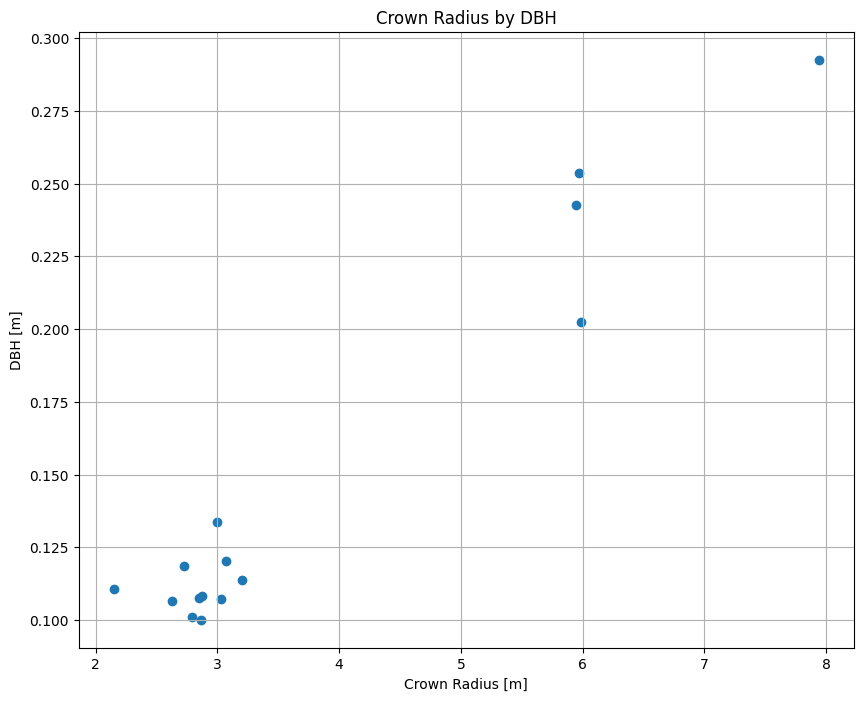

In [32]:
# Get DBH over 10cm
tree_merged_df_filtered = tree_merged_df[tree_merged_df['DBH'] > 0.1]

# Set figure size
plt.figure(figsize=(10, 8))

# Create scatter plot
plt.scatter(tree_merged_df_filtered['crown_radius'], tree_merged_df_filtered['DBH'])

# Add grid lines
plt.grid(True)

# Add labels and title
plt.xlabel('Crown Radius [m]')
plt.ylabel('DBH [m]')
plt.title('Crown Radius by DBH')

# Show the plot
plt.show()

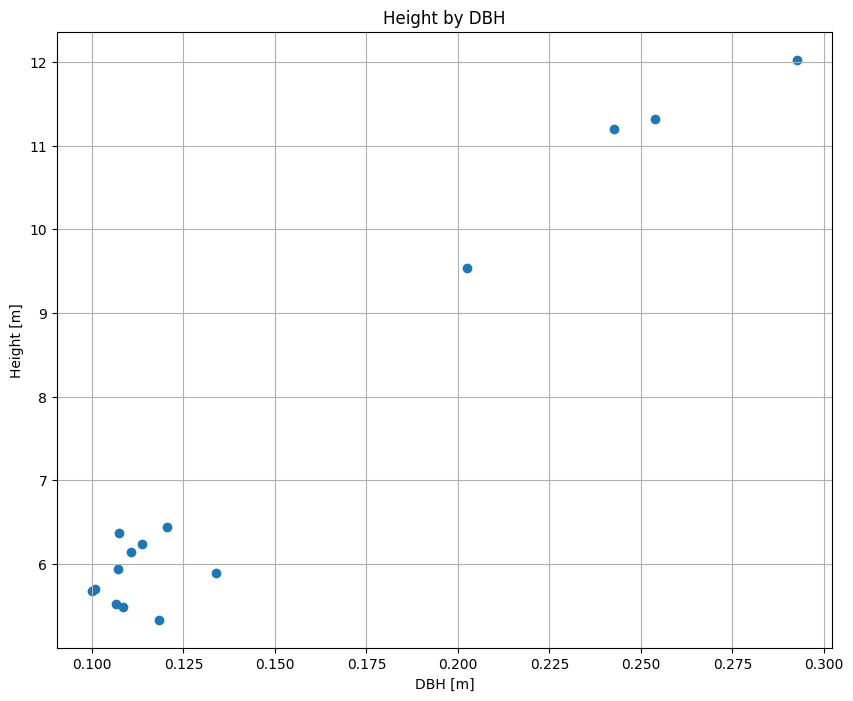

In [33]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create scatter plot
plt.scatter(tree_merged_df_filtered['DBH'], tree_merged_df_filtered['height'])

# Add grid lines
plt.grid(True)

# Add labels and title
plt.xlabel('DBH [m]')
plt.ylabel('Height [m]')
plt.title('Height by DBH')

# Show the plot
plt.show()

### Plot tree locations and stem diameter

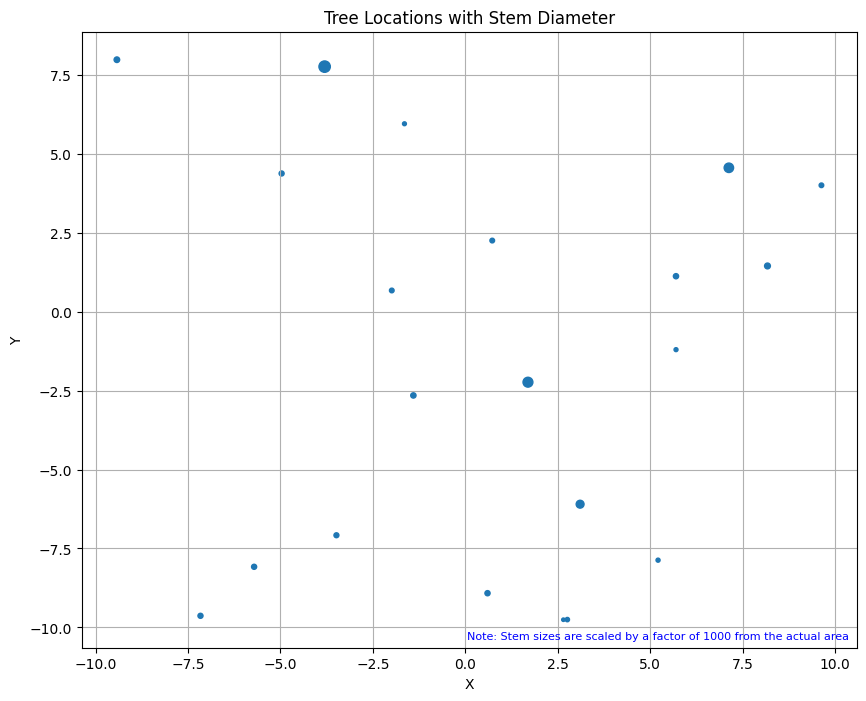

In [34]:
plt.figure(figsize=(10, 8))

tree_merged_df['stem_area'] = np.pi * (tree_merged_df['radius'] ** 2)
scatter = plt.scatter(tree_merged_df['x'], tree_merged_df['y'], s=tree_merged_df['stem_area'] * 1000)

# This is an example text, adjust the placement and text as needed
plt.text(0.99, 0.01, 'Note: Stem sizes are scaled by a factor of 1000 from the actual area',
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes,  # This aligns the text to the axes
         color='blue', fontsize=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Tree Locations with Stem Diameter')
plt.grid(True)

plt.show()

In [35]:
tree_merged_df

,tree_id,height,crown_radius,dimension,monocotal,DBH,bend,branch_slope,volume,x,y,z,radius,parent_id,section_id,stem_area
0,1,6.4465,3.0673,1.6896,0.2133,0.1204,0.0201,0.9506,0.0644,-9.4221,7.9715,0.0223,0.0715,-1.0,0.0,0.016061
1,2,5.7072,2.7912,1.6894,0.1508,0.1009,0.0233,1.1782,0.0494,-7.1616,-9.6308,0.0113,0.0651,-1.0,1.0,0.013314
2,3,5.5259,2.6302,1.8924,0.2570,0.1066,0.0220,1.0538,0.0486,-5.7115,-8.0795,0.0026,0.0655,-1.0,2.0,0.013478
3,4,6.3748,2.8451,1.7520,0.1799,0.1074,0.0089,0.8673,0.0527,-4.9679,4.3707,0.0082,0.0645,-1.0,3.0,0.013070
4,5,5.4953,2.5555,1.7444,0.1425,0.0989,0.0169,1.2340,0.0433,-3.4859,-7.0810,0.0080,0.0635,-1.0,4.0,0.012668
5,6,12.0253,7.9385,1.7826,0.2271,0.2926,0.0201,1.0015,0.5785,-3.8047,7.7526,0.0001,0.1463,-1.0,5.0,0.067242
6,7,6.2397,3.2004,1.7126,0.1884,0.1136,0.0197,0.9982,0.0570,-1.4054,-2.6551,0.0159,0.0683,-1.0,6.0,0.014655
7,8,5.6775,2.8617,1.6309,0.1987,0.1001,0.0202,1.1474,0.0398,-1.9893,0.6673,0.0123,0.0599,-1.0,7.0,0.011272
8,9,4.9661,2.3482,1.5834,0.3146,0.0838,0.0241,0.8534,0.0248,-1.6464,5.9442,0.0004,0.0500,-1.0,8.0,0.007854
9,10,5.9423,3.0314,1.7497,0.1941,0.1072,0.0211,1.1430,0.0556,0.5994,-8.9155,0.0037,0.0666,-1.0,9.0,0.013935


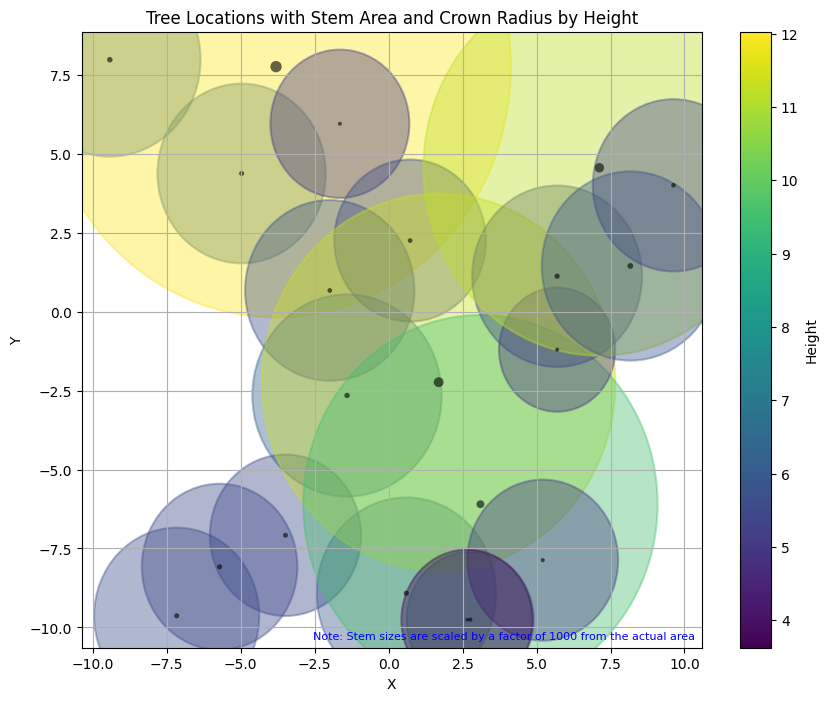

In [36]:
### Plotting the tree locations with stem diameter and crown radius
import matplotlib.colors as mcolors

# Setup the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Define the colormap for the crown radius circles
cmap = plt.cm.viridis

# Normalize the height column for the colormap to color the crown radius circles by tree height
norm = mcolors.Normalize(vmin=tree_merged_df['height'].min(), vmax=tree_merged_df['height'].max())


# Adding circles to represent crown radius, colored by height
for idx, row in tree_merged_df.iterrows():
    color = cmap(norm(row['height']))  # Determine circle color based on tree height
    crown_circle = plt.Circle((row['x'], row['y']), row['crown_radius'], color=color, fill=True, alpha=0.4, linewidth=1.5)
    ax.add_artist(crown_circle)
# Plotting tree locations with stem area as black circles
ax.scatter(tree_merged_df['x'], tree_merged_df['y'], s=tree_merged_df['stem_area'] * 1000, c='black', label='Stem Area', alpha=0.6, edgecolors='none')

# Customizing the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Tree Locations with Stem Area and Crown Radius by Height')
ax.grid(True)

# Adding a colorbar to indicate the scale for tree height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Height')

# This is an example text, adjust the placement and text as needed
plt.text(0.99, 0.01, 'Note: Stem sizes are scaled by a factor of 1000 from the actual area',
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes,  # This aligns the text to the axes
         color='blue', fontsize=8)


plt.show()